<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Initial-Thoughts-and-Response-to-the-Business-Problem" data-toc-modified-id="Initial-Thoughts-and-Response-to-the-Business-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Thoughts and Response to the Business Problem</a></span></li><li><span><a href="#Importing-Modules-and-Opening-Relevant-DataFrames" data-toc-modified-id="Importing-Modules-and-Opening-Relevant-DataFrames-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing Modules and Opening Relevant DataFrames</a></span></li><li><span><a href="#Box-Office-Gross" data-toc-modified-id="Box-Office-Gross-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Box Office Gross</a></span></li><li><span><a href="#name.basics-csv" data-toc-modified-id="name.basics-csv-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>name.basics csv</a></span></li><li><span><a href="#imdb.title.basics.csv" data-toc-modified-id="imdb.title.basics.csv-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>imdb.title.basics.csv</a></span></li><li><span><a href="#Merge-gross_df-and-titles_df" data-toc-modified-id="Merge-gross_df-and-titles_df-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Merge gross_df and titles_df</a></span></li><li><span><a href="#imdb.title.ratings.csv.gz" data-toc-modified-id="imdb.title.ratings.csv.gz-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>imdb.title.ratings.csv.gz</a></span></li><li><span><a href="#tmdb.movies.csv" data-toc-modified-id="tmdb.movies.csv-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>tmdb.movies.csv</a></span></li><li><span><a href="#Joining-Relevant-Tables" data-toc-modified-id="Joining-Relevant-Tables-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Joining Relevant Tables</a></span></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: Daniel Ross-Leutwyler
* Student pace: **self paced** / part time / full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## Initial Thoughts and Response to the Business Problem

**"Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create."**

There are lots of metrics to measure success but in the film industry the two main ways one can determine if a movie is successful are gross sales, and critical response. 

By analyzing what attributes the top grossing movies all share, and what the critical response to those movies was, we can make informed suggestions about what sort of film Microsoft should pursue.

## Importing Modules and Opening Relevant DataFrames

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppressing scientific notation for legibility
pd.options.display.float_format = '{:,.2f}'.format

sns.set_context('talk')

These are the data sets that I have determined are relevant to answering the stakeholder questions.

In [165]:
# creating variables to call for opening csv
box_office_gross = 'zippedData/bom.movie_gross.csv'
name_basics = 'zippedData/imdb.name.basics.csv'
title_basics = 'zippedData/imdb.title.basics.csv'
ratings_url = 'zippeddata/imdb.title.ratings.csv.gz'

I have determined that these data sets are not relevant to the business question, either due to lack of crossover/compatibility with other sets, and outdated or incomplete data.

imbd.title.akas.csv\
imdb.title.crew.csv\
imdb.principles.csv\
rt.movie_info.tsv\
rt.reviews.tsv\
tmdb.movies.csv

## Box Office Gross

In this notebook I will perform EDA on the dataset, beginning with the bom.movie_gross .csv

In [123]:
gross_df = pd.read_csv(box_office_gross)
display(gross_df.head())
display(gross_df.info())
display(gross_df.isna().sum())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000.00",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",664300000,2010
3,Inception,WB,"292,600,000.00",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000.00",513900000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The gross_df table contains a data frame of movies from 2011-2018. Each row represents one movie, and each columns contains the the following values:

***'title', 'studio', 'domestic_gross', 'foreign_gross', and 'year'.***

There are no null entries in the ***title*** column, which contains objects.

There are 5 null entries in the ***studio*** column, which contains objects.

There are 28 null values in the ***domestic_gross*** column, which contains numbers, specifically floats.

There are 1350 null values in the ***foreign_gross*** column, which contains object, and will need to be cast as a float. The null values will need to be replaced.

***hypothesis: foreign_gross should be summed with domestic_gross, as the global nature of media today makes the foreign/domestic binary less important. ***

There are no nulls in the ***year*** column, which contains integers. 

Examining the 'foreign_gross' column:

In [124]:
# while trying to cast the foreign gross column as a float, I realized there
# are ',' that have to be removed before the column can be made into float
gross_df['foreign_gross'].str.contains(',').sum()

5

In [125]:
# removing commas to be able to cast as float and sanity check
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',','')
gross_df['foreign_gross'].str.contains(',').sum()

0

In [126]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].astype(float)
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [127]:
# small function to look at the rows with null values
def see_nans(df, cols=None): 
    """accepts a data frame, and optionally columns
    returns a data frame of all null values.
    
    Used primarily for previewing missing data"""
    
    if cols is None:
        cols = df.columns
    return df[df[cols].isnull().any(axis=1)]

see_nans(gross_df, ['foreign_gross']).head(20)

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,"1,800,000.00",nan,2010
254,The Polar Express (IMAX re-issue 2010),WB,"673,000.00",nan,2010
267,Tiny Furniture,IFC,"392,000.00",nan,2010
269,Grease (Sing-a-Long re-issue),Par.,"366,000.00",nan,2010
280,Last Train Home,Zeit.,"288,000.00",nan,2010
287,Sweetgrass,CGld,"207,000.00",nan,2010
291,Casino Jack and the United States of Money,Magn.,"177,000.00",nan,2010
308,Alamar,FM,"61,600.00",nan,2010
311,Hatchet 2,Vita.,"52,600.00",nan,2010
319,Living in Emergency,Truly,"32,200.00",nan,2010


A cursory search of the foreign box office receipts for several movies on this list demonstrates that while some of these movies did not have a foreign theatrical release (Flipped), it appears that some of the movies foreign box office receipts have already been counted in the domestic gross category (Courageous), and others have simply had that info omitted. The labor required to correctly update this data base is beyond my abilities. I will replace all the Nan values in this column with 0.

In [128]:
# replacing NaNs with 0 and sanity check
gross_df['foreign_gross'] = gross_df['foreign_gross'].replace(np.nan, 0)
display(gross_df['foreign_gross'].isnull().sum())
gross_df['foreign_gross'].dtype

0

dtype('float64')

In [129]:
print(f"The domestic gross sum is: ${round(gross_df['domestic_gross'].sum()):,}")
print(f"The domestic gross mean is: ${round(gross_df['domestic_gross'].mean()):,}")
print(f"The foreign gross sum is: ${round(gross_df['foreign_gross'].sum()):,}")
print(f"The foreign gross mean is: ${round(gross_df['foreign_gross'].mean()):,}")

The domestic gross sum is: $96,557,293,580.0
The domestic gross mean is: $28,745,845.0
The foreign gross sum is: $152,515,914,276.0
The foreign gross mean is: $45,029,795.0


Above we can see that the both the total foreign box office receipts and the foreign box office mean are ***higher*** than domestic.

This means we may give special consideration to movies that performed well in foreign markets.

I will also add an additional column for total_gross summing the domestic and foreign columns.

In [130]:
gross_df['total_sales'] = (gross_df['domestic_gross'] + gross_df['foreign_gross'])
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_sales
0,Toy Story 3,BV,"415,000,000.00","652,000,000.00",2010,"1,067,000,000.00"
1,Alice in Wonderland (2010),BV,"334,200,000.00","691,300,000.00",2010,"1,025,500,000.00"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00","664,300,000.00",2010,"960,300,000.00"
3,Inception,WB,"292,600,000.00","535,700,000.00",2010,"828,300,000.00"
4,Shrek Forever After,P/DW,"238,700,000.00","513,900,000.00",2010,"752,600,000.00"


In [131]:
top_100_domestic = gross_df.sort_values('domestic_gross', ascending=False)[:100]
top_100_foreign = gross_df.sort_values('foreign_gross', ascending=False)[:100]
top_100_total = gross_df.sort_values('total_sales', ascending=False)[:100]

display(top_100_domestic.head())
display(top_100_foreign.head())
display(top_100_total.head())

,title,studio,domestic_gross,foreign_gross,year,total_sales
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.60",2015,"936,701,131.60"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.50",2018,"678,801,369.50"
1873,Jurassic World,Uni.,"652,300,000.00","1,019.40",2015,"652,301,019.40"
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"


,title,studio,domestic_gross,foreign_gross,year,total_sales
328,Harry Potter and the Deathly Hallows Part 2,WB,"381,000,000.00","960,500,000.00",2011,"1,341,500,000.00"
1875,Avengers: Age of Ultron,BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"
3081,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00"
1127,Frozen,BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"


,title,studio,domestic_gross,foreign_gross,year,total_sales
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"
1875,Avengers: Age of Ultron,BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
328,Harry Potter and the Deathly Hallows Part 2,WB,"381,000,000.00","960,500,000.00",2011,"1,341,500,000.00"
2758,Star Wars: The Last Jedi,BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"


It is clear from looking at the top_100_domestic films sorted by domestic_gross that the foreign_gross values are incorrect. It is not possible that there were only $1,131 of receipts for Star Wars the Force Awakens, and imdb stats confirm this.

Exploring incorrect values in the foreign_gross column:

In [132]:
top_100_domestic.sort_values('foreign_gross').head(6)

,title,studio,domestic_gross,foreign_gross,year,total_sales
2760,The Fate of the Furious,Uni.,"226,000,000.00","1,010.00",2017,"226,001,010.00"
1873,Jurassic World,Uni.,"652,300,000.00","1,019.40",2015,"652,301,019.40"
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.60",2015,"936,701,131.60"
1874,Furious 7,Uni.,"353,000,000.00","1,163.00",2015,"353,001,163.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.50",2018,"678,801,369.50"
748,Dr. Seuss' The Lorax,Uni.,"214,000,000.00","134,800,000.00",2012,"348,800,000.00"


Ok, luckily we only have to manually scrape and replace the foreign gross box office receipts from 5 movies. Phew.

In [133]:
mapping_dict = {1010.00 : 1009996733,
               1019.40 : 1018130819,
               1131.60 : 1132859475,
               1163.00 : 1162334379,
               1369.50 : 1369544272}

gross_df['foreign_gross'] = gross_df['foreign_gross'].replace(mapping_dict)

In [135]:
# also need to re-concatinate the total_sales column as total_gross
# to reflect the updated foreign_gross
gross_df['total_gross'] = (gross_df['domestic_gross'] + gross_df['foreign_gross'])
gross_df.drop('total_sales', axis=1, inplace=True)

In [137]:
# recreating the top_100_x dataframes with the updated
# foreign receipt data
top_100_domestic = gross_df.sort_values('domestic_gross', ascending=False)[:100]
top_100_foreign = gross_df.sort_values('foreign_gross', ascending=False)[:100]
top_100_total = gross_df.sort_values('total_gross', ascending=False)[:100]

display(top_100_domestic.head())
display(top_100_foreign.head())
display(top_100_total.head())

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,132,859,475.00",2015,"2,069,559,475.00"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369,544,272.00",2018,"2,048,344,272.00"
1873,Jurassic World,Uni.,"652,300,000.00","1,018,130,819.00",2015,"1,670,430,819.00"
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"


,title,studio,domestic_gross,foreign_gross,year,total_gross
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369,544,272.00",2018,"2,048,344,272.00"
1874,Furious 7,Uni.,"353,000,000.00","1,162,334,379.00",2015,"1,515,334,379.00"
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,132,859,475.00",2015,"2,069,559,475.00"
1873,Jurassic World,Uni.,"652,300,000.00","1,018,130,819.00",2015,"1,670,430,819.00"
2760,The Fate of the Furious,Uni.,"226,000,000.00","1,009,996,733.00",2017,"1,235,996,733.00"


,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,132,859,475.00",2015,"2,069,559,475.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369,544,272.00",2018,"2,048,344,272.00"
1873,Jurassic World,Uni.,"652,300,000.00","1,018,130,819.00",2015,"1,670,430,819.00"
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"
1874,Furious 7,Uni.,"353,000,000.00","1,162,334,379.00",2015,"1,515,334,379.00"


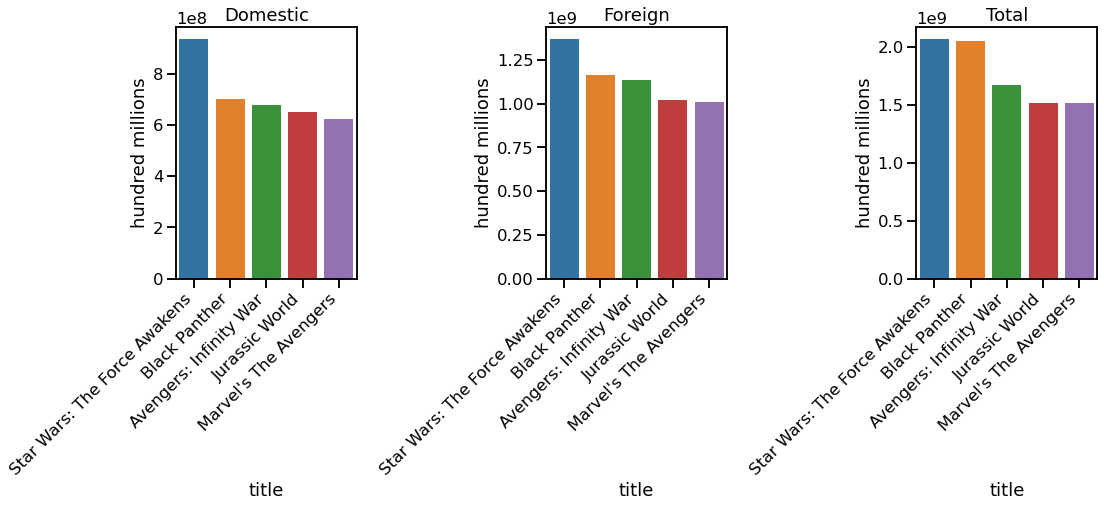

In [166]:
fig, [ax1, ax2, ax3] = plt.subplots(1 ,3 , figsize=(15,5))
sns.barplot(data=top_100_domestic.head(), x='title', y='domestic_gross', ax=ax1)
sns.barplot(data=top_100_foreign.head(), x='title', y='foreign_gross', ax=ax2)
sns.barplot(data=top_100_total.head(), x='title', y='total_gross', ax=ax3)
ax1.set_title('Domestic')
ax1.set_ylabel('hundred millions')
ax2.set_title('Foreign')
ax2.set_ylabel('hundred millions')
ax3.set_title('Total')
ax3.set_ylabel('hundred millions')
plt.tight_layout()
ax1.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
ax2.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
ax3.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');

## name.basics csv

In [110]:
name_basics_url = 'zippedData/imdb.name.basics.csv'
name_df = pd.read_csv(name_basics_url)

In [111]:
name_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [112]:
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [113]:
see_nans(name_df)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


**The relevance of this data frame is not clear.** Would most likely be useful to drop the birth year (high NaNs) and drop all the dead names from it, as they cannot help us with make movies.

It may be an interesting side quest to try and tie people to the most successful movies via known_for_titles, when making suggestions for who should direct, produce, compose the music, etc.

In [114]:
title_aka_url = 'zippedData/imdb.title.akas.csv'
title_alias_df = pd.read_csv(title_aka_url)

In [115]:
title_alias_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [116]:
title_alias_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


The usefulness of this dataframe is suspect, unless I decide to tie the names of the talent from names.basic to the names of the movies that they worked on. I'm not sure if this is the direction this EDA will take.

Possible data cleaning tasks for this csv include dealing with nulls (evaluating the importance of the 'language', 'types', and 'attributes' columns in particular.

## imdb.title.basics.csv

In [117]:
title_basics_url = 'zippedData/imdb.title.basics.csv'
title_basics_df = pd.read_csv(title_basics_url)

In [118]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [119]:
title_basics_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [120]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [121]:
title_basics_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [122]:
title_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

The title.basics table appears to contain a data frame primarily of movies from 2010-2018, but also with some titles from ***THE FUTURE***. Each row represents one movie, and contains columns with the following values:

'tconst', 'primary_title', 'original_title', 'start_year','runtime_minutes', 'genres'

There are no null entries in the tconst column, which is an object, as I would expect, and we will use this column as the index to ***join this df with other dfs.***

There are no null entries in the start_year column, which is an integer, as I would expect. ***This column will require cleaning to deal with movies from the future.***

There are significant null entires in the runtime_minutes column, which may be of questionable use. ***It may be worth exploring the relationship between movie length and box office success.***

There are 5408 null values in the genres column. This column will require more exploration as we will need it to help make decisions about what kind of movies Microsoft should be making.


Exploring the start_year column:

In [123]:
title_basics_df[title_basics_df['start_year'] > 2021].head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
821,tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
948,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
1330,tt10108854,The Hunchback of the Lighthouse,The Hunchback of the Lighthouse,2022,120.0,Drama
2465,tt10251718,Corazones en Llamas 5,Corazones en Llamas 5,2022,NaN,Action
2483,tt10255736,Untitled Marvel Project,Untitled Marvel Project,2023,NaN,Action


In [124]:
# we will set aside the movies from the future. There may be vaule in
# evaluating them by genre to see what is lined up in the future, but
# this evaluation would be supplementary to our primary question.
future_movies_df = title_basics_df.loc[title_basics_df['start_year'] > 2021]
title_basics_df = title_basics_df.loc[title_basics_df['start_year'] <= 2021]

In [125]:
title_basics_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
Name: start_year, dtype: int64

***Exploring the genre column:***

In [126]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [127]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,adjusted_foreign_gross,total_sales
0,Toy Story 3,BV,415000000.0,652000000.0,2010,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,664300000.0,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,535700000.0,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,513900000.0,7.526000e+08


In [128]:
# df = pd.merge(title_basics_df, gross_df, left_on='original_title',
#               right_on='title')
# df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,adjusted_foreign_gross,total_sales
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,NaN,2016,18700000.0,19800000.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,Oolong Courtyard,CL,37700.0,NaN,2018,18700000.0,18737700.0
2772,tt8802728,The Witch,The Witch,2018,NaN,Horror,The Witch,A24,25100000.0,15300000.0,2016,15300000.0,40400000.0
2773,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Spring Fever,Strand,10800.0,150000.0,2010,150000.0,160800.0
2774,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,16100000.0,20300000.0


## Merge gross_df and titles_df

In [90]:
df = pd.merge(title_basics_df, gross_df, left_on='primary_title',
              right_on='title')
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,adjusted_foreign_gross,total_sales
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,NaN,2016,18700000.0,19800000.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,How Long Will I Love U,WGUSA,747000.0,82100000.0,2018,82100000.0,82847000.0
3362,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,Helicopter Eela,Eros,72000.0,NaN,2018,18700000.0,18772000.0
3363,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Spring Fever,Strand,10800.0,150000.0,2010,150000.0,160800.0
3364,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",Last Letter,CL,181000.0,NaN,2018,18700000.0,18881000.0


In [129]:
df_split = df.copy() 
df_split['genres_split'] = df_split['genres'].str.split(',')
df_split.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,adjusted_foreign_gross,total_sales,genres_split
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,NaN,2016,18700000.0,19800000.0,"[Action, Crime, Drama]"
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0,"[Adventure, Drama, Romance]"
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0,[Drama]
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0,[Documentary]
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0,[Drama]


In [131]:
df_split = df_split.explode('genres_split')

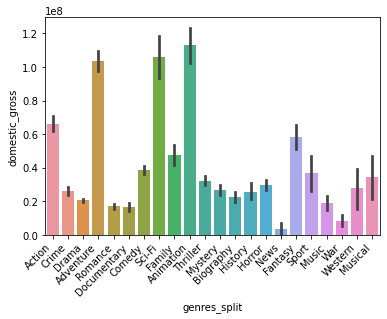

In [135]:
ax = sns.barplot(data=df_split, x='genres_split', y='domestic_gross', ci=68)
plt.xticks(rotation=45, ha='right');

In [86]:
title_basics_df['genres'].value_counts()

Documentary                      32184
Drama                            21484
Comedy                            9177
Horror                            4371
Comedy,Drama                      3519
                                 ...  
Adventure,Fantasy,War                1
Adventure,Horror,Romance             1
Animation,Documentary,Mystery        1
Musical,Mystery,Sci-Fi               1
Adventure,History,Western            1
Name: genres, Length: 1085, dtype: int64

In [87]:
# splitting the concatinated genres
expanded_genre_df = title_basics_df['genres'].str.split(',', expand=True)
new_cols = ['primary', 'secondary', 'tertiary']
expanded_genre_df.columns = new_cols

In [49]:
title_basics_df = title_basics_df.merge(expanded_genre_df, left_index=True, right_index=True)

In [51]:
title_basics_df = title_basics_df.drop('genres', axis=1)
title_basics_df.groupby('primary').sort_values('primary')

KeyError: "['genres'] not found in axis"

In [ ]:
title_basics_df[['primary', 'secondary', 'tertiary']] = title_basics_df[[
    'primary', 'secondary', 'tertiary']].fillna('None')

In [136]:

ax = sns.histplot(data=title_basics_df, x='primary')
ax.set_title('Distribution of Genre Types')
ax.set_xlabel('Genre')
ax.tick_params(axis='x', labelrotation=90)




ValueError: Could not interpret value `primary` for parameter `x`

Excepting documentaries and movies without a genre label, the genre with the most movies is 'drama', followed by 'comedy' and 'action'.

This title_basics_df is now in a format that is more useful for us. I will eventually join it with the gross sales df to explore how certain genres are correlated with box office sales.

In [ ]:
title_url = 'zippeddata/imdb.title.crew.csv.gz'
pd.read_csv(title_url)

This is a table with what appears to be an index of the moves, with their tconst ID and the corresponding directors and writers with their IDs.

I am going to ignore this table for now.

In [ ]:
princ_url = 'zippeddata/imdb.title.principals.csv'
principals_df = pd.read_csv(princ_url)

In [ ]:
principals_df.head()

In [ ]:
principals_df.info()

Similarly, this is a table with the movie title as a tconst ID, with the individual pricncipals (director, producer, star, etc.) associated with that movie. I don't believe this will be particularly useful for my analysis.

## imdb.title.ratings.csv.gz

In [8]:
ratings_url = 'zippeddata/imdb.title.ratings.csv.gz'
ratings_df = pd.read_csv(ratings_url)

In [9]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
ratings_df.info()

This table should be very useful once we have merged it with title_basics. I can then compare the ratings on IMDB with the gross sales to explore that correlation.

It does not appear that any cleaning needs to be done. Every column has no nulls, and is of the expected dtype.

In [ ]:
minfo_url = 'zippeddata/rt.movie_info.tsv'
movie_info_df = pd.read_csv(minfo_url, delimiter='\t')

In [ ]:
movie_info_df.head()

In [ ]:
movie_info_df.tail()

In [ ]:
movie_info_df.info()

This table looks fascinating, but doesn't contain ***relevant*** info. There is no title to associate the info with a particular movie, and the years are outside of the scope of most of our other data. It requires a lot of dtype casting and cleaning and does not appear to be worth investigating further.

In [6]:
mreviews_url = 'zippeddata/rt.reviews.tsv'
reviews_df = pd.read_csv(mreviews_url, delimiter='\t', encoding='unicode_escape')

In [7]:
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Similar to the movie_info table above, I am not seeing how this table can be used since it is not able to be associated with the movie IDs that the other tables use.

## tmdb.movies.csv

In [3]:
mov_url = 'zippeddata/tmdb.movies.csv'
movie_df = pd.read_csv(mov_url)

In [4]:
movie_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
movie_df.info()

## Joining Relevant Tables

In [ ]:
title_df = title_basics_df.copy()

In [ ]:
title_df.head()

In [ ]:
title_df.info()

In [ ]:
title_sort_df = title_df.sort_values('tconst')

In [ ]:
ratings_sort_df = ratings_df.sort_values('tconst')

In [ ]:
title_ratings_df = title_sort_df.merge(ratings_sort_df, on='tconst')

In [ ]:
title_ratings_df.info()

In [ ]:
title_ratings_df.head()

In [ ]:
title_ratings_df.drop(['original_title', 'tertiary'], axis=1, inplace=True)

In [ ]:
gross_df.sort_values('title')